## Step 3 - Climate Analysis and Exploration

In [2]:
#Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc
from sqlalchemy import func

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
sns.set() 

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()  

In [5]:
# Start & end dates
trip_start_date = '2017-06-01'                                              
trip_end_date = '2017-06-12'

In [6]:
# Automaps and reflects database
Base = automap_base()                                                        
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement                                       
Station = Base.classes.station
Base.classes.keys()      

['measurement', 'station']

In [7]:
# Initializes inspector
#inspector = inspect(engine)                                                  

In [8]:
# Initializes session
session = Session(engine)                                                    

### Precipitation Analysis

In [9]:
# Getting dates for the last 12 months
prcp_analysis = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()

In [10]:
# Getting precipitation data
prcp_df = pd.DataFrame(prcp_analysis)  
#Convert date to datetime object
prcp_df['date'] = pd.to_datetime(prcp_df['date'])

In [11]:
#Set index to date column and rename columns
prcp_df = prcp_df.set_index('date')                                      
prcp_df.rename(columns = {'prcp': 'precipitation'}, inplace=True)         
prcp_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


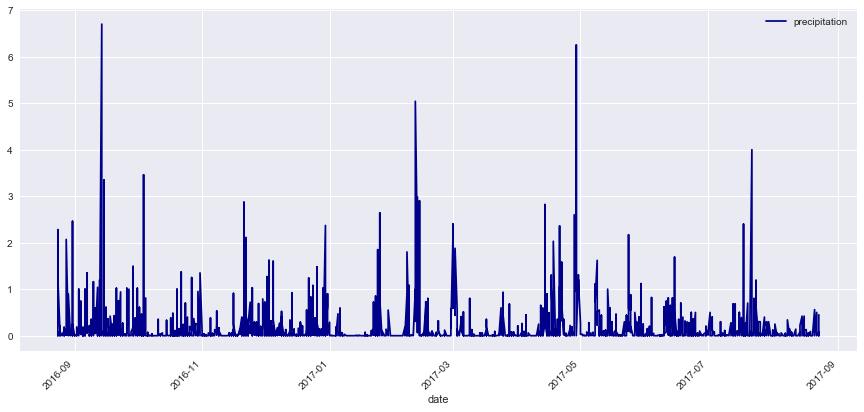

In [12]:
# Plot the data 
prcp_df.plot(rot=45,
             grid=True,
             color='darkblue',
             figsize=(15, 7))
plt.show()

In [13]:
prcp_df.describe()

,precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


### Station Analysis

In [14]:
# Count the number of stations
station_count = session.query(Station.id).count()
print(f'There are {station_count} stations.')

There are 9 stations.


In [15]:
# Query to find station activity sorted
station_activity = session.query(Measurement.station, Station.name,func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

station_activity

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [16]:
# Station with the highest number of observations
station_activity[0]

('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [17]:
#Get station with most activity
for row in reversed(station_activity):                                       
    most_active_station=row.station
    most_active_name=str(row.name)

In [18]:
# Finds tobs for most active station
most_active_station_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == most_active_station, Measurement.station == Station.station,\
       Measurement.date >="2016-08-24", Measurement.date <="2017-08-23").all()


In [19]:
# Add temperatures to list
temperatures = [temp[0] for temp in most_active_station_tobs] 


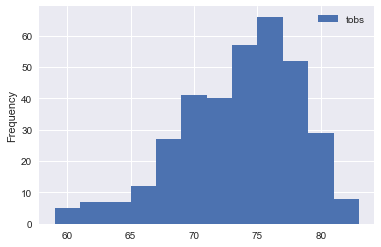

In [20]:
# Plotting histogram
plt.hist(temperatures, bins=12, label='tobs')
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Temperature Analysis

In [21]:
# calc_temps function
def calc_temps(start, end):
    temp_list = []
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    temp_list.append(np.mean(temperatures))
    temp_list.append(min(temperatures))
    temp_list.append(max(temperatures))
    
    return temp_list

In [22]:
#
def  get_prev_year_date(target):
    try:
        date_split = target.split('-')
        date_string = (str(int(date_split[0])-1)) + '-' + date_split[1] + '-' + date_split[2]
        return date_string
    except:
        return target

In [23]:
# Get previous year start and end dates
start_convert = get_prev_year_date(trip_start_date)                             
end_convert = get_prev_year_date(trip_end_date)

In [24]:
# Call calc_temps to get plot data
temp_list = calc_temps(start_convert, end_convert)                                 

In [25]:
# Displays list of data
temp_list                                                                   

[73.36, 64.0, 80.0]

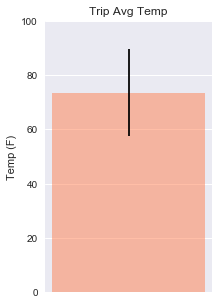

In [26]:
# Plotting bar
plt.figure(figsize=(3,5))
plt.bar(1,temp_list[0], yerr=(temp_list[2]-temp_list[1]),alpha=0.5, color = 'coral')
plt.title("Trip Avg Temp")
plt.xticks([])
plt.ylim(0,100)
plt.ylabel("Temp (F)")
plt.show()